

<h1 color=red>Rania Gannouni</h1>
<h2>Projet Analyse de données</h2>


<img src="img.png" />


In [17]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
"Pandas: "+pd.__version__ + ", Numpy: " + np.__version__ + ", Matplot Lib: " + matplotlib.__version__


'Pandas: 1.4.4, Numpy: 1.21.5, Matplot Lib: 3.5.2'

#loading the dataset

In [6]:
data=pd.read_csv('fifa.csv', sep=',')
np_data=np.array(data)
data.head()


,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,Gábor Király,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


In [7]:
data.describe()

,id,rating,height,rare,positioning
count,8847.000000,8847.000000,8847.000000,8847.000000,930.000000
mean,152337.538035,66.680457,181.750424,0.353114,64.955914
std,54506.606056,7.146679,6.454356,0.477965,8.854231
min,2.000000,40.000000,158.000000,0.000000,37.000000
25%,140001.500000,62.000000,178.000000,0.000000,59.000000
50%,171578.000000,66.000000,182.000000,0.000000,65.000000
75%,189185.000000,72.000000,186.000000,1.000000,71.000000
max,205583.000000,94.000000,208.000000,1.000000,91.000000


# what is the median height of the players ? does it affect the performance/ratings somehow?

In [8]:
"Median Height = " + str(np.median(data[' height']))

'Median Height = 182.0'

Text(0, 0.5, 'Player Rating')

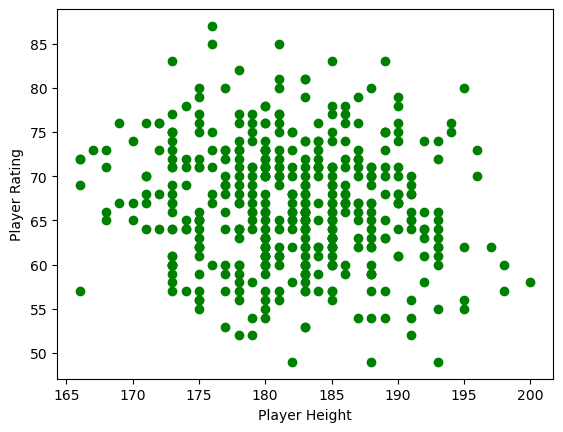

In [7]:
plt.plot(data[' height'][::20], data[' rating'][::20], 'go')
plt.xlabel('Player Height')
plt.ylabel('Player Rating')

#This shows that there is absolutely no correlation b/w player rating and height. So, the height of a player does not affect his game/skills/rating in football (w.r.t the given dataset).

Text(0, 0.5, 'Player Rating')

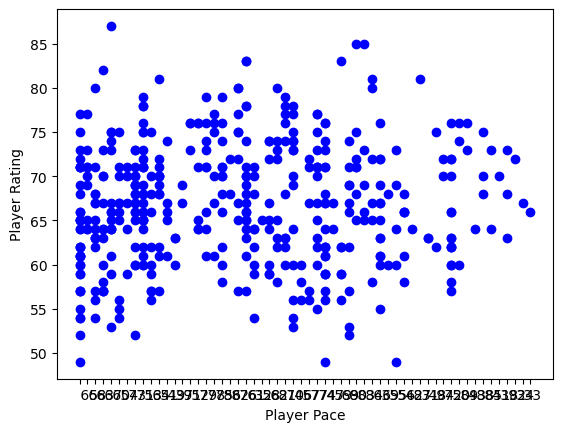

In [9]:
plt.plot(data[' pace'][::20], data[' rating'][::20], 'bo')
plt.xlabel('Player Pace')
plt.ylabel('Player Rating')

#This shows that there is no correlation b/w player rating and pace.(w.r.t the given dataset).

In [ ]:
#there are some NaN values, we need to clean them

In [10]:
cleandata = data.dropna(subset=[' positioning']) #cleaning data rows where rating is NaN
data.shape

(8847, 19)

In [11]:
cleandata.shape

(930, 19)

Text(0, 0.5, 'Player Rating')

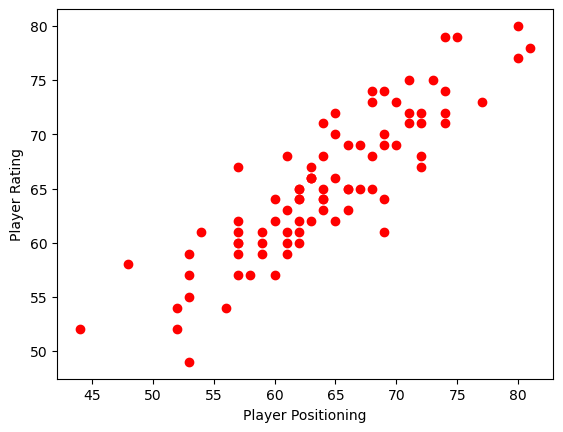

In [11]:
plt.plot(data[' positioning'][::10], data[' rating'][::10], 'ro')
plt.xlabel('Player Positioning')
plt.ylabel('Player Rating')

In [12]:
xVal = cleandata[[' positioning']].values.tolist()
yVal = cleandata[[' rating']].values.tolist()
model = linear_model.LinearRegression()
model.fit(xVal, yVal)

LinearRegression()

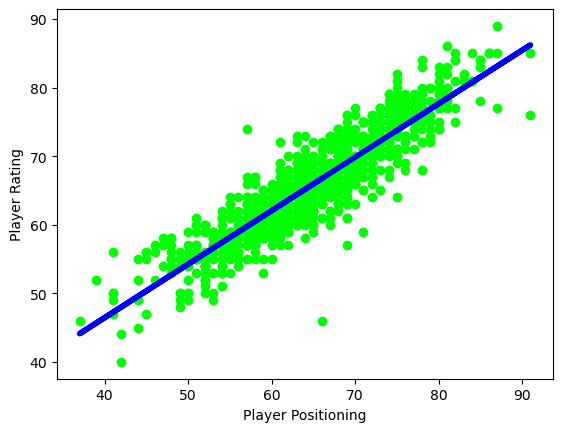

In [13]:
plt.scatter(xVal, yVal, color='lime')
plt.plot(xVal, model.predict(xVal), 'b-', linewidth=4.0)
plt.xlabel('Player Positioning')
plt.ylabel('Player Rating')
plt.show()

In [ ]:
#Pseudo Model :

In [13]:
def predict(pos):
    
    '''This function returns:
       The estimated rating given the positioning is entered as a parameter
    '''
    return round((model.predict(pos)).tolist()[0][0])